In [4]:
# Import all necessary libraries
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import Adam


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# load dataset, and split into train, test
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [7]:
 # reshape dataset to have a single grey scale images channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [8]:
# convert train and test into float type
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [9]:
# CNN model definition
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804554 (3.07 MB)
Trainable params: 804554 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [23]:
# Access the weights of the layers
for layer in model.layers:
    print(f"Layer: {layer.name}")
    weights = layer.get_weights()
    if weights:
        for i, w in enumerate(weights):
            print(f"  Weights {i + 1} shape: {w.shape}")

Layer: conv2d
  Weights 1 shape: (3, 3, 1, 32)
  Weights 2 shape: (32,)
Layer: max_pooling2d
Layer: flatten
Layer: dense
  Weights 1 shape: (6272, 128)
  Weights 2 shape: (128,)
Layer: dense_1
  Weights 1 shape: (128, 10)
  Weights 2 shape: (10,)


In [11]:
# define early stoppage when maximum accuracy reached.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [12]:
# Training of model
history = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size = 32, epochs = 100,callbacks = early_stopping)

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3919 - accuracy: 0.8616 - val_loss: 0.3131 - val_accuracy: 0.8840
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2679 - accuracy: 0.9025 - val_loss: 0.2953 - val_accuracy: 0.8927
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2243 - accuracy: 0.9181 - val_loss: 0.2502 - val_accuracy: 0.9106
Epoch 4/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1920 - accuracy: 0.9293 - val_loss: 0.2722 - val_accuracy: 0.9057
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1654 - accuracy: 0.9389 - val_loss: 0.2560 - val_accuracy: 0.9119
Epoch 6/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1422 - accuracy: 0.9474 - val_loss: 0.2514 - val_accuracy: 0.9143
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1210 - accuracy: 0.9552 - val_loss: 0.2598 - val_a

In [13]:
# Evaluate model performance
result = model.evaluate(testX, testY)
print("Accuracy : {:.3f}".format(result[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.9156
Accuracy : 0.916


In [14]:
# Decoding one-hot encoded values to original labels
decoded_labels = np.argmax(trainY, axis=1)


In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display class names
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")

Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


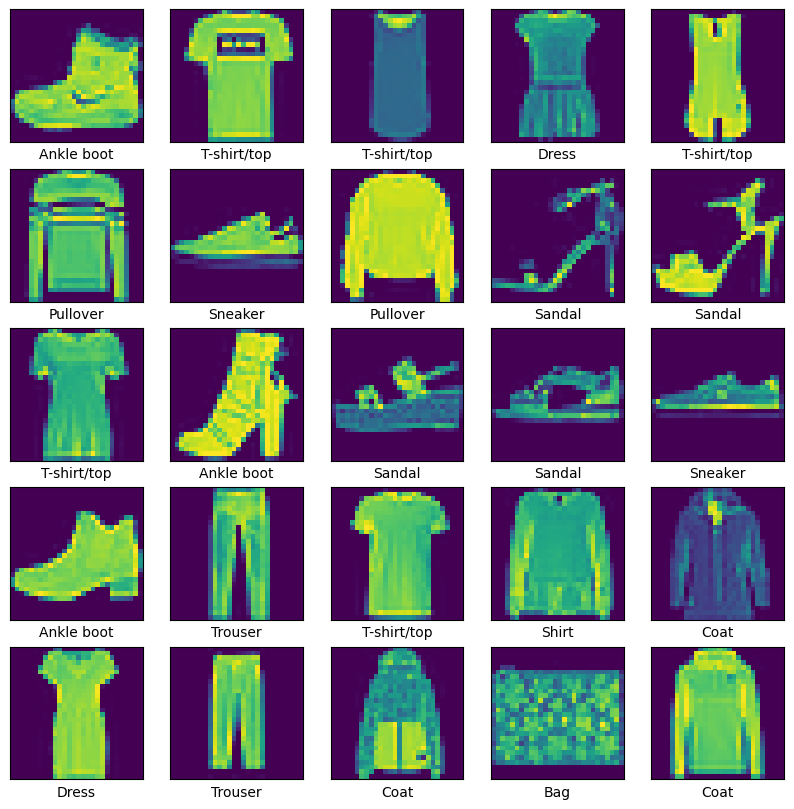

In [16]:
# Display top 25 training set images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i])
    plt.xlabel(class_names[decoded_labels[i]])
plt.show()

1875/1875 - 4s - loss: 0.0121 - accuracy: 0.9958 - 4s/epoch - 2ms/step


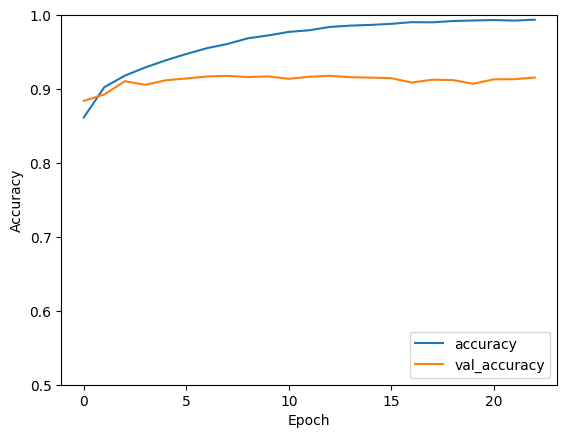

In [17]:
# Plot training and validation accuracy of model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(trainX,  trainY, verbose=2)

In [18]:
print(test_acc)

0.9958333373069763


1/1 [==============================] - 0s 121ms/step


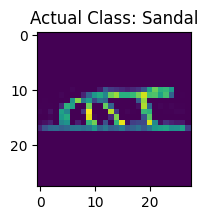

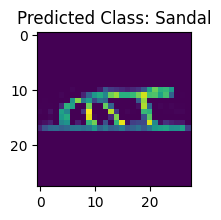

In [19]:
# Predict label of a random image from test set.
random_index = np.random.randint(0, len(testX))
random_image = testX[random_index]

random_image = random_image.astype('float32')
random_image = random_image / 255.0  # Normalize the pixel values


random_image = np.expand_dims(random_image, axis=0)  # Add batch dimension

predictions = model.predict(random_image)

predicted_class = np.argmax(predictions)

actual_class = np.argmax(testY[random_index])

plt.figure(figsize=(2, 2))
plt.imshow(testX[random_index])
plt.title(f'Actual Class: {class_names[actual_class]}')
plt.show()


predicted_class_index = np.argmax(predictions)
plt.figure(figsize=(2, 2))
# Squeeze the dimensions
random_image = np.squeeze(random_image)
plt.imshow(random_image)
plt.title(f'Predicted Class: {class_names[predicted_class]}')
plt.show()
